In [1]:
# import Libraries
import pandas as pd
import math 
import scipy.stats as st
import statsmodels.stats.api as sm

In [2]:
# Load data

def Load_data(df : pd.DataFrame):
     
     """
     Read the data
     
     """
     
     try:
          data = pd.read_csv(df)
          return data
     except FileNotFoundError:
          print(f"Error: File not found:")
          
     except Exception as e:
          raise RuntimeError(f"RuntimeError")
     
     return None

df = r'C:\Users\mk744\OneDrive - Poornima University\Desktop\Feature Scaling\Basic_statistics\Wine-quality-challenge.csv'
data = Load_data(df)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Normal Distribution

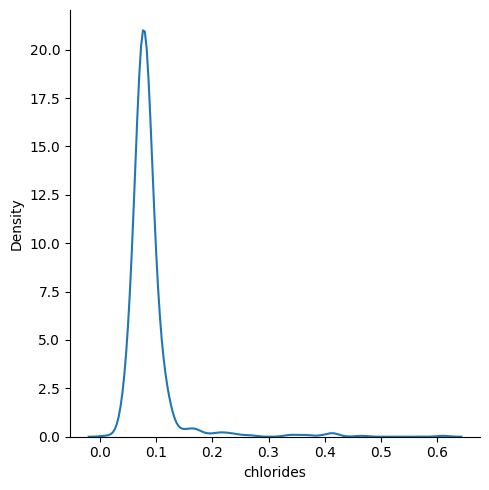

In [3]:
# Density plot of Chlorides
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme

def Distribution_Plot(data):
     """_summary_
        Plot the 
        Distribution
        Plot.
     """
     try:
          
          sns.displot(data, x="chlorides", kind="kde")
          plt.show()
     except RecursionError:
          raise RecursionError("Errors")
     except Exception as e:
          print("An Exception Error is occured: {e}")
          
plots = Distribution_Plot(data)
plots

In [4]:
data.loc[(data.alcohol <= data.alcohol.mean() + 3 * data.alcohol.std()) & 
         (data.alcohol >= data.alcohol.mean() - 3 * data.alcohol.std())].alcohol.count() / data.alcohol.count()

0.9949968730456535

In [5]:
import pandas as pd

def Observation(data: pd.DataFrame) -> float:
    """
    Find the share of observations within 3 standard deviations of alcohol.

    Parameters:
    data (pd.DataFrame): The DataFrame containing the 'alcohol' column.

    Returns:
    float: Proportion of observations within 3 standard deviations of the mean.
    """
    try:
        # Filter the data within 3 standard deviations of the mean
        within_3_std = data.loc[
            (data.alcohol <= data.alcohol.mean() + 3 * data.alcohol.std()) & 
            (data.alcohol >= data.alcohol.mean() - 3 * data.alcohol.std())
        ]
        
        # Calculate the proportion of observations within this range
        proportion = within_3_std.alcohol.count() / data.alcohol.count()
        
        return proportion

    except Exception as e:
        print(f"Error: An Exception occurred - {e}")
        return None


Data = Observation(data)
if Data is not None:
    print("The share of observations within 3 standard deviations of alcohol is:")
    print(Data)


The share of observations within 3 standard deviations of alcohol is:
0.9949968730456535


In [6]:
# Shpiro Wilks test for suphates and
# create if else condition.

stat , p = st.shapiro(data.sulphates)
print(p)

if p > 0.05:
     print("Sample looks Gaussian or Normal (Fail to reject)")
     
else:
     print("Sample does not look Gaussian / Normal (reject the H0)")

5.821617678881608e-38
Sample does not look Gaussian / Normal (reject the H0)


In [7]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [8]:
def Shapiro_test(data: pd.DataFrame)->float :
     
     """
     Perform Shapiro Wilk test
     on fixed acidity columns
     
     """
     try:
          stat, p = st.shapiro(data.alcohol)
          return stat, p
     
     
     except RuntimeError:
          print(f"RuntimeError")
          
     except Exception as e:
          print(f"Error: {e}")
          
     return None

ans = Shapiro_test(data)
p = 0.05
if p > 0.05:
     print("Sample looks Gaussian or Normal (Fail to reject)")
     
else:
     print("Sample does not look Gaussian / Normal (reject the H0)")
     
print(ans)
          

Sample does not look Gaussian / Normal (reject the H0)
(0.9288375377655029, 6.63998167657323e-27)


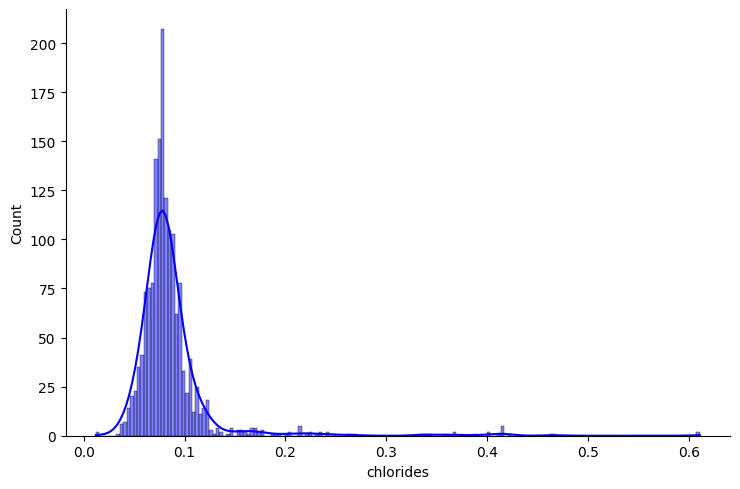

In [9]:
def Distplot(data):
     
     try:
          sns.displot(data, x = 'chlorides', kde = True,
                      height=5, aspect=1.5, color="blue")
          plt.show()
          
     except Exception as e:
          print(f"Error: {e}")
          
Distplot(data)

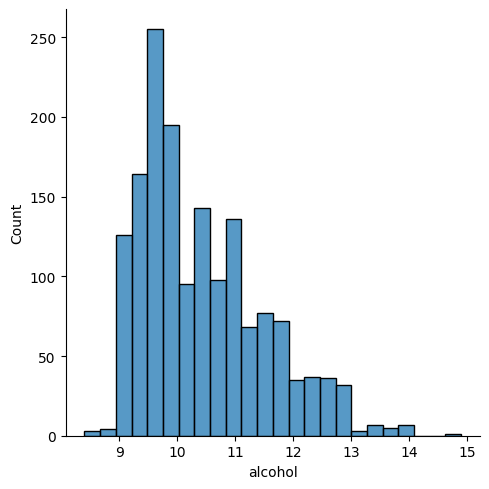

In [10]:
sns.displot(data, x="alcohol")

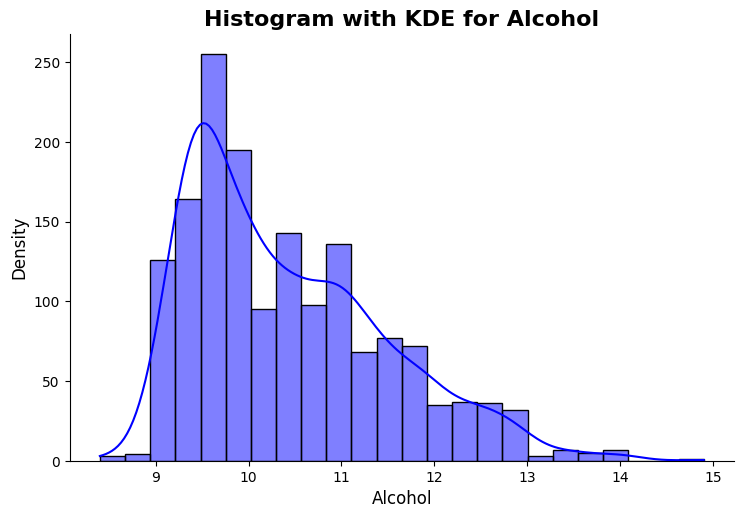

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example histogram with KDE
sns.displot(data, x="alcohol", kde=True, height=5, aspect=1.5, color="blue")

# Add titles and labels
plt.title("Histogram with KDE for Alcohol", fontsize=16, weight='bold')
plt.xlabel("Alcohol", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Display the plot
plt.show()


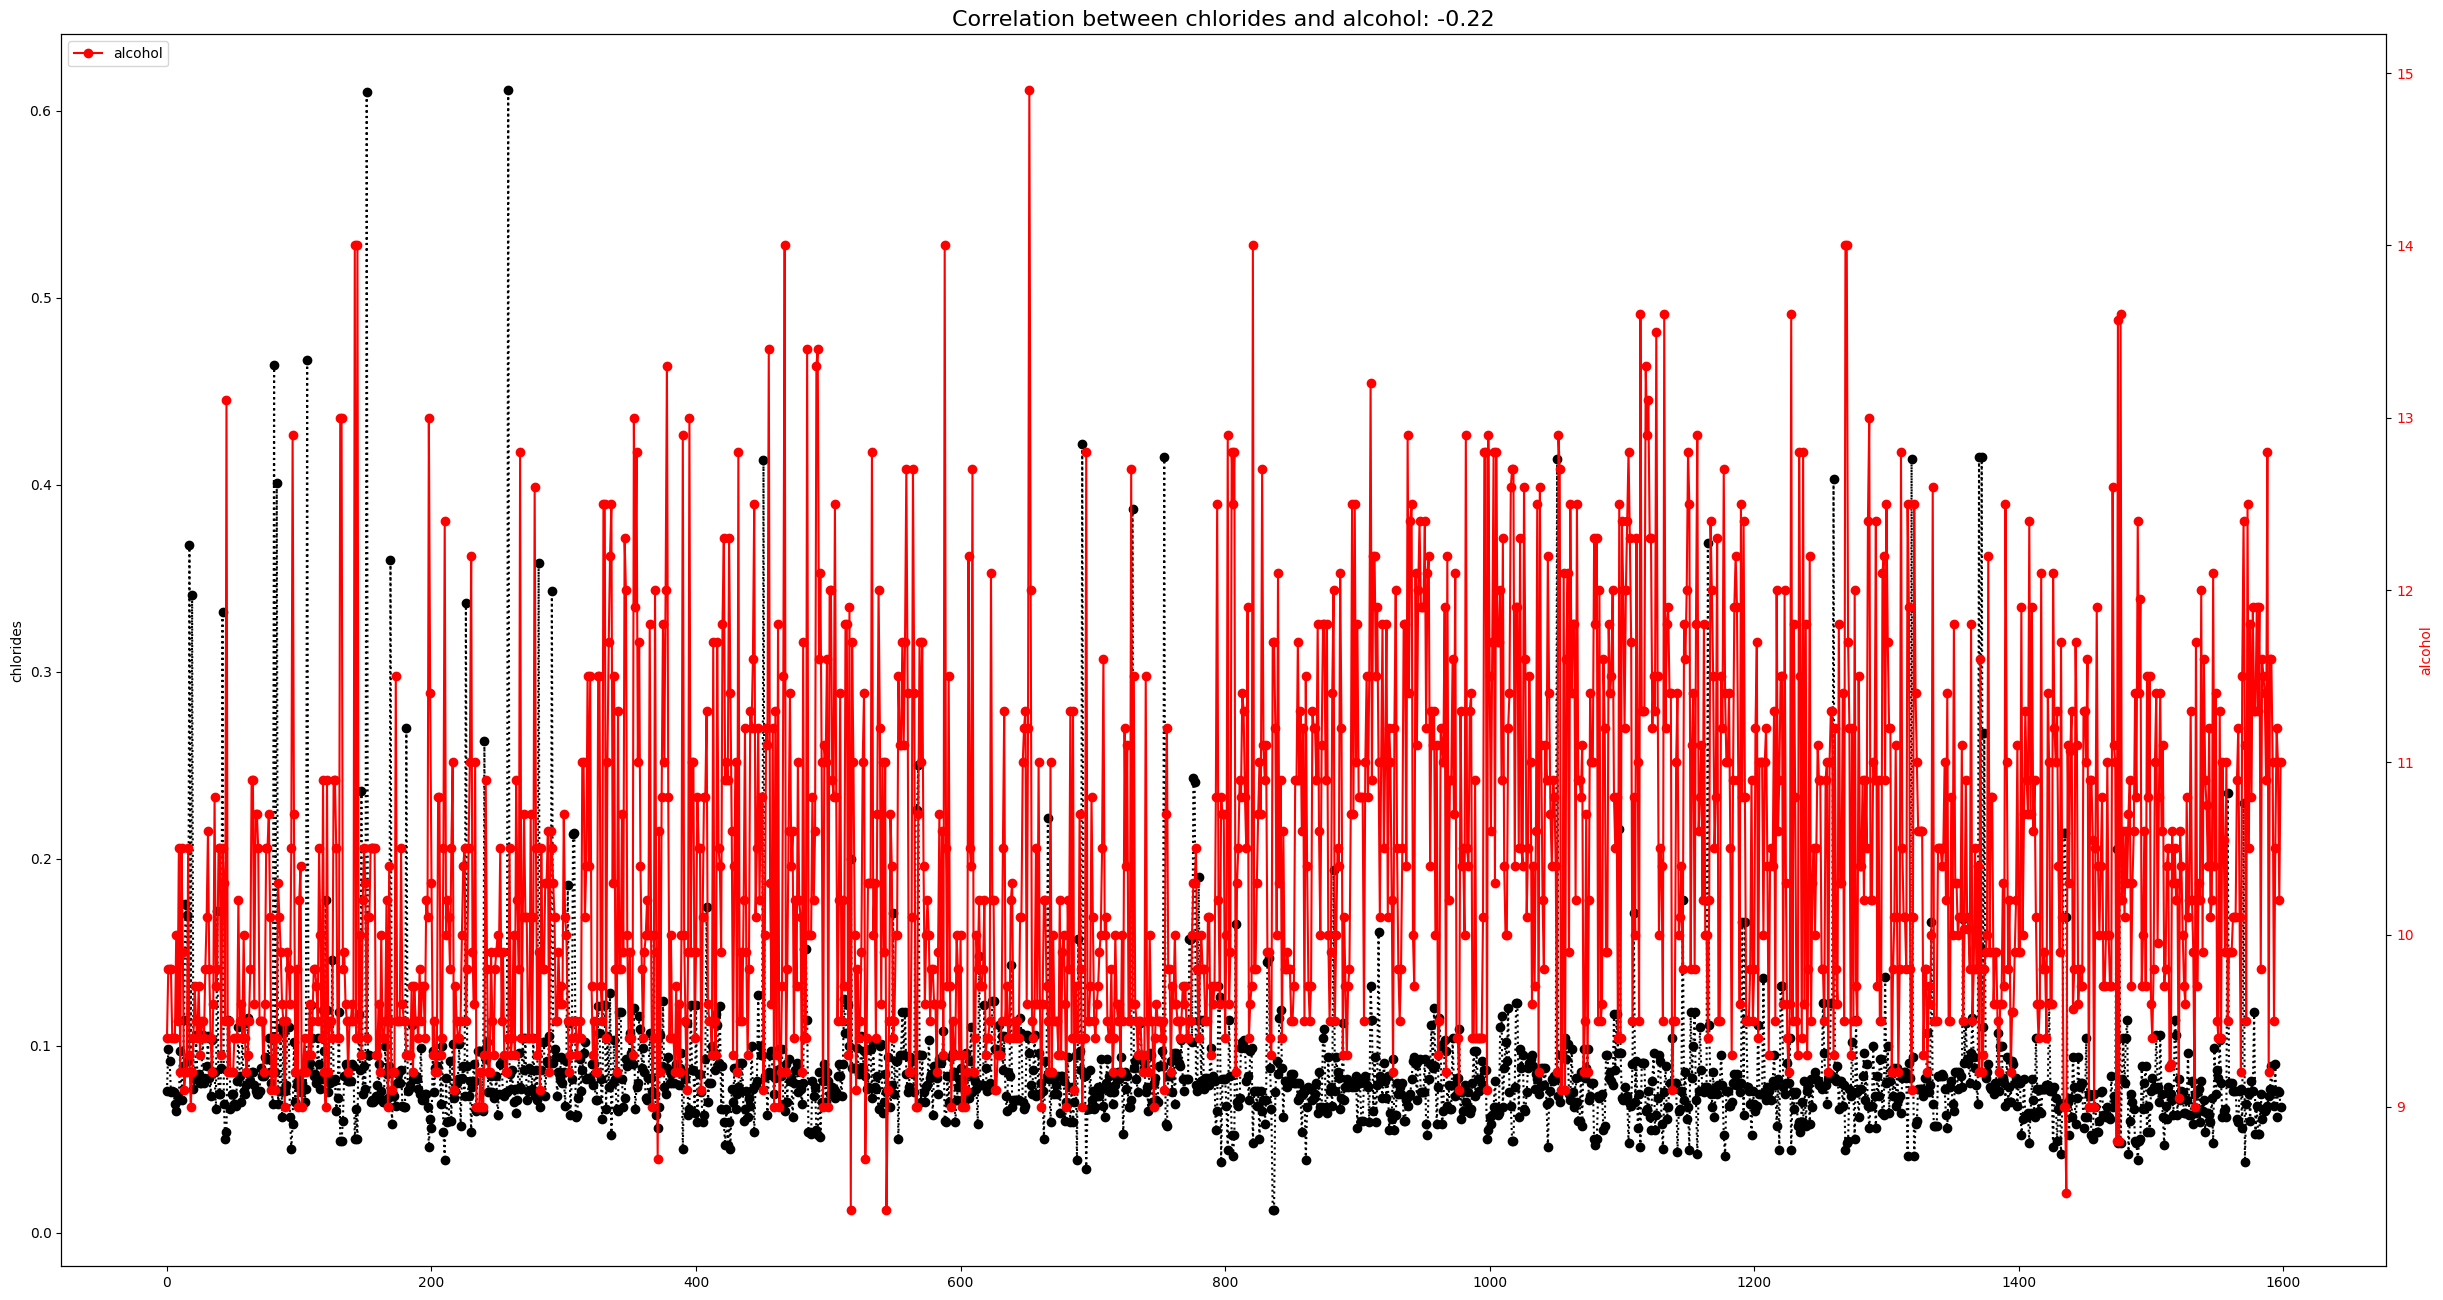

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_correlation(data, col1, col2):
    """
    Plots the correlation between two columns using plt for dual y-axes.
    
    Args:
    - data: pandas DataFrame containing the dataset.
    - col1: str, name of the first column.
    - col2: str, name of the second column.
    """
    # Calculate the correlation
    correlation = np.corrcoef(data[col1], data[col2])[0, 1]
    
    # Create the plot
    plt.figure(figsize=(30, 16))
    
    # Plot the first column (chlorides) with its y-axis
    plt.plot(data[col1], color='black', linestyle='dotted', marker='o', label=f'{col1}')
    plt.ylabel(col1, color='black')
    plt.tick_params(axis='y', labelcolor='black')
    
    # Overlay the second column (sulphates) with another y-axis
    plt.twinx()
    plt.plot(data[col2], color='red', linestyle='solid', marker='o', label=f'{col2}')
    plt.ylabel(col2, color='red')
    plt.tick_params(axis='y', labelcolor='red')
    
    # Add a title showing the correlation
    plt.title(f'Correlation between {col1} and {col2}: {correlation:.2f}', fontsize=16)
    
    # Display the legend
    plt.legend(loc='upper left')
    
    # Show the plot
    plt.show()

plot_correlation(data, 'chlorides', 'alcohol')


# Standard Error:

In [13]:
# by using function
# by the computation  std / sqr(n)

def Standard_Error(data: pd.DataFrame)->float:
     
     """_summary_
        Find the 
        std Error
     """
     try:
          return st.sem(data.alcohol)
     
     except Exception as e:
          print(f"Error {e}")
          
          return None
     
def Std_Computational(data:pd.DataFrame)->float:
     
     """
     Find the std 
     Error by Computational
     Methods.
     
     """
     import math as m
     try:
          return data.alcohol.std() / m.sqrt(data.alcohol.count())
     
     except Exception as e:
          print(f"Error: {e}")
          
# Standard Error of PH

def Std_PH(data: pd.DataFrame)->float:
     
     """_summary_
     Find the std
     of PH 
     """
     import math as m
     try:
          return data.pH.std() / m.sqrt(data.pH.count())
     
     except Exception as e:
          print(f"Error: {e}")
          
     
std_error = Standard_Error(data)
print("The standard error is: \n", std_error)
print("\t")
print("The stadard Error using Computational method is:\n", Std_Computational(data))
print("\t")
print("The std of pH \n", Std_PH(data))

The standard error is: 
 0.026650018979018173
	
The stadard Error using Computational method is:
 0.026650018979018173
	
The std of pH 
 0.0038608683325203784


# Z-Score 
- (Z = x - mean / sigma)

# Confidence Interval
- CI = mean + z * sigma / sqrt()
            

In [14]:
# Confidence interval of the mean of citric acid
print(data[['citric acid']].mean())
st.norm.interval(confidence = 0.95,
                 loc = data[['citric acid']].mean(), 
                 scale = st.sem(data[['citric acid']]))

citric acid    0.270976
dtype: float64


(array([0.26142755]), array([0.28052367]))

(array([0.26142755]), array([0.28052367]))


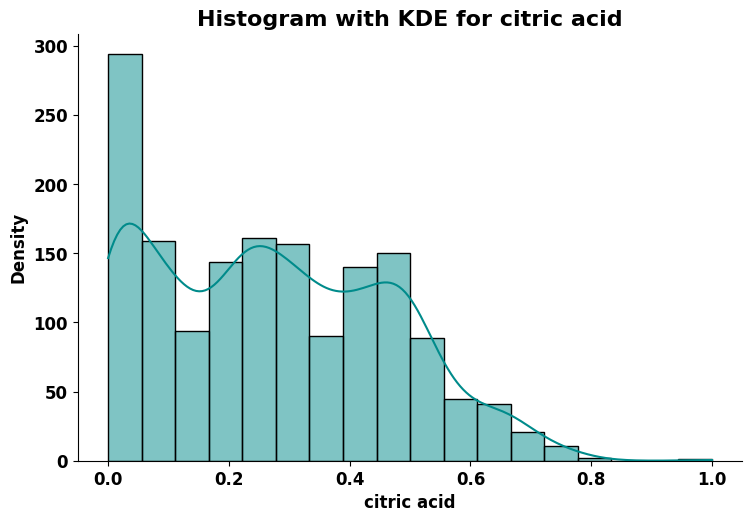

In [15]:
# Confidence Interval and Visualization

def Confidence_Interval(data: pd.DataFrame)->float:
     
     """
     Find the confidence 
     Interval of Citric acid
     
     """
     
     try:
          return st.norm.interval(confidence = 0.95,
                                  loc = data[
                                       ['citric acid']
                                       ].mean()
                                  , scale = st.sem(
                                       data[['citric acid']]
                                       )
                              )
     except TypeError:
          raise TypeError(f"Error:")
         
     except Exception as e:
          print(f"Error is occurred : {e}")
          return None
     

def Histogram_plot(data: pd.DataFrame)->float:
     
     """_summary_
     
        Visualize on 
        Histogram.
        
     """
     try:
          import seaborn as sns
          import matplotlib.pyplot as plt
          sns.displot(data,
                    x = "citric acid",
                    kde = True, 
                    height = 5,
                    aspect = 1.5,
                    color = '#008B8B'
                    )
          plt.title("Histogram with KDE for citric acid", fontsize=16, weight='bold')
          plt.xlabel("citric acid", fontsize=12, weight = 'bold')
          plt.ylabel("Density", fontsize=12, weight = 'bold')
          plt.xticks(fontsize = 12, weight = 'bold')
          plt.yticks(fontsize = 12, weight = 'bold')
          plt.show()
          
     except TypeError:
          raise TypeError(f"Type Error is occurred")
     
     except Exception as e:
          print(f"Error: {e}")
          return None
     
     
print(Confidence_Interval(data))

Histogram_plot(data)
          

     

(array([0.99665417]), array([0.99683919]))


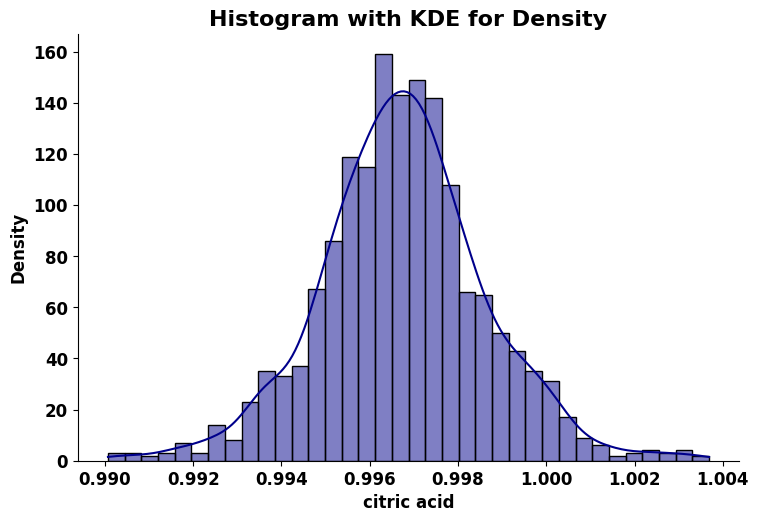

In [16]:
# Confidence interval of the Density mean
# Histogram of Density mean
# Confidence Interval and Visualization

def Confidence_Intervals(data: pd.DataFrame)->float:
     
     """
     Find the confidence 
     Interval of Citric acid
     
     """
     
     try:
          return st.norm.interval(confidence = 0.95,
                                  loc = data[
                                       ['density']
                                       ].mean()
                                  , scale = st.sem(
                                       data[['density']]
                                       )
                              )
     except TypeError:
          raise TypeError(f"Error:")
         
     except Exception as e:
          print(f"Error is occurred : {e}")
          return None
     

def Histogram_plots(data: pd.DataFrame)->float:
     
     """_summary_
     
        Visualize on 
        Histogram.
        
     """
     try:
          import seaborn as sns
          import matplotlib.pyplot as plt
          sns.displot(data,
                    x = "density",
                    kde = True, 
                    height = 5,
                    aspect = 1.5,
                    color = 'darkblue'
                    )
          plt.title("Histogram with KDE for Density", fontsize=16, weight='bold')
          plt.xlabel("citric acid", fontsize=12, weight = 'bold')
          plt.ylabel("Density", fontsize=12, weight = 'bold')
          plt.xticks(fontsize = 12, weight = 'bold')
          plt.yticks(fontsize = 12, weight = 'bold')
          plt.show()
          
     except TypeError:
          raise TypeError(f"Type Error is occurred")
     
     except Exception as e:
          print(f"Error: {e}")
          return None
     
     
print(Confidence_Intervals(data))

Histogram_plots(data)
          

     


# T-Test 

In [17]:
# Load the dataset and Apply the T-test.

def Load_the_data(df: pd.DataFrame):
     
     """
     Load the data
     and Apply the
     T-Test.
     
     """
     
     try:
          data = pd.read_csv(df)
          return data
     
     except FileNotFoundError:
          raise FileNotFoundError(f"Error:")
     except Exception as e:
          print(f"An Exception is occurred")
          
# Apply the T-Test
def T_Test(df: pd.DataFrame)->float:
     
     """
     Find the 
     T-Test on
     Salary Columns
     
     """
     try:
          salary_uk = df.loc[df.Country == 'United Kingdom'].Salary
          salary_de = df.loc[df.Country == 'Germany'].Salary
          stat, p = st.ttest_ind(a = salary_uk, b = salary_de)
          return stat, p
     
     except TypeError:
          raise TypeError(f"It is Type Error:")
     except Exception as e:
          print(f"Error is : {e}")
          return None
          
          
data = Load_the_data(df = r'C:\Users\mk744\OneDrive - Poornima University\Desktop\Feature Scaling\Basic_statistics\stackoverflow.csv')
p = 0.05

if p > 0.05:
     print("Both countries have similar salaries (fail to reject H0)")
else:
     print("There is a difference in Salaries (reject H0)") 
print(T_Test(data)) 
data.head(2)

There is a difference in Salaries (reject H0)
(2.2222769691089583, 0.026389999555203502)


,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.0,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.0,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1


In [18]:
data['Country'].value_counts().reset_index(name='count').sort_values(by='Country', ascending=True)

,Country,count
4,Canada,485
2,Germany,757
3,India,538
1,United Kingdom,1023
0,United States,2791


Groups are different (reject H0)
(-16.372922047831, 5.225676347614714e-58)


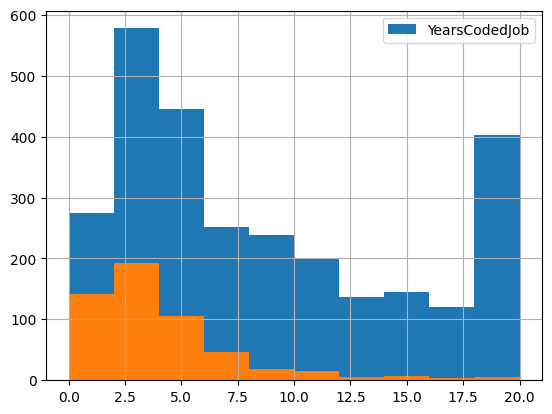

In [19]:
# T-Test in experience between India and USA

def T_Test_Ind_USA(df: pd.DataFrame)->float:
     
     """_summary_
     
        Fint the
        T-Test in
        Experience
        between India
        and USA.
        
     """
     try:
          Salary_Ind = df.loc[df.Country == 'India'].YearsCodedJob
          Salary_USA = df.loc[df.Country == 'United States'].YearsCodedJob
          stat, p = st.ttest_ind(a = Salary_Ind , b = Salary_USA)
          Salary_USA.hist(legend =True)
          Salary_Ind.hist()
          return stat, p 
     
     except TypeError:
          raise TypeError(f"It is Type Error:")
     
     except Exception as e:
          print(f"It is showing an exception")
          return None
     
   
p = 0.05
if p > 0.05:
     print("Groups are similar (fail to reject H0)")
else:
     print("Groups are different (reject H0)") 
print(T_Test_Ind_USA(data)) 


     

# Chi Square Test

In [20]:
# Find the Chi Square Test

def Chi_Sqr_Test(data: pd.DataFrame)->float:
     
     """_summary_
       Find the Chi-
       Square Test on
       Column Country 
       and People Working
       Remotly.
       
     """
     
     try:
          tab = pd.crosstab(index = data.Country,
                            columns = data.Remote
                            )
          chi2, p, dof, exp = st.chi2_contingency(tab)
          return chi2, p, dof, exp
          
     except TypeError:
          raise TypeError(f"Type Error")
     
     except Exception as e:
          print(f"The error is occurring")
          
data = Chi_Sqr_Test(data)
if p > 0.05:
     print("There is no relationship (fail to reject H0)")
else:
     print("There is a strong relationship (reject H0)")
data

There is a strong relationship (reject H0)


(78.67672415412689,
 3.3211208773012153e-16,
 4,
 array([[ 435.14747944,   49.85252056],
        [ 679.18895245,   77.81104755],
        [ 482.69967823,   55.30032177],
        [ 917.84715767,  105.15284233],
        [2504.11673221,  286.88326779]]))